<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%9F%D1%80%D0%BE%D1%81%D1%82%D0%B0%D1%8F_%D0%B0%D0%BF%D0%BF%D1%80%D0%BE%D0%BA%D1%81%D0%B8%D0%BC%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Простая аппроксимация

# Simple approximation


В этом уроке мы научимся аппроксимировать контур

In this lesson we will learn how to approximate a contour




> **Аппроксимация контура**  - это алгоритм уменьшения количества точек на кривой с уменьшенным набором точек. Этот алгоритм широко известен как алгоритм Рамера-Дугласа-Пекера или просто: алгоритм разделения и слияния.

> **Contour approximation** is an algorithm for reducing the number of points on a curve with a reduced set of points. This algorithm is commonly known as the Ramer-Douglas-Pecker algorithm or simply: the split and merge algorithm.

Общая идея этого алгоритма состоит в том, что кривую можно аппроксимировать серией коротких отрезков линии.





The general idea of this algorithm is that a curve can be approximated by a series of short line segments.

In [1]:
!wget http://dataudt.ru/datasets/cv/Lesson_29.Approximation_simple.zip
!unzip Lesson_29.Approximation_simple.zip
%cd /content/Lesson_29.Approximation_simple

--2022-02-03 18:31:12--  http://dataudt.ru/datasets/cv/Lesson_29.Approximation_simple.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14134 (14K) [application/zip]
Saving to: ‘Lesson_29.Approximation_simple.zip’

Lesson_29.Approxima 100%[===================>]  13.80K  --.-KB/s    in 0s      

2022-02-03 18:31:13 (106 MB/s) - ‘Lesson_29.Approximation_simple.zip’ saved [14134/14134]

Archive:  Lesson_29.Approximation_simple.zip
  inflating: Lesson_29.Approximation_simple/Approximation_simple.py  
  inflating: Lesson_29.Approximation_simple/shapes_03.png  
  inflating: Lesson_29.Approximation_simple/shapes_04.png  
/content/Lesson_29.Approximation_simple


In [2]:
# импортируем необходимые модули
# import the necessary packages
import cv2
import imutils
from google.colab.patches import cv2_imshow

In [3]:
# создаем отдельный словарь с аргументами 
# create a separate dictionary with arguments 
args = {
  # путь к входному изображению 
  # the path to the input image 
  "image" : 'shapes_04.png' 
}

In [4]:
# загружаем изображение кругов и квадратов
# и конвертируем его в оттенки серого
# load the the cirles and squares image and convert it to grayscale
image = cv2.imread(args['image'])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# найдём контуры на изображении
# find contours in the image
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

Image


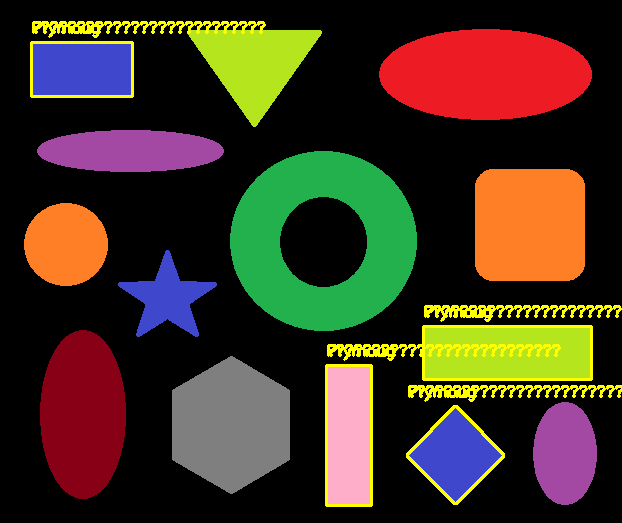

In [6]:
# перебираем контуры
# loop over the contours
for c in cnts:
    # аппроксимируем контур
    # approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.01 * peri, True)

    # если аппроксимируемый контур имеет 4 вершины, 
    # то рассматриваем прямоугольник
    # if the approximated contour has 4 vertices, then we are examining
	# a rectangle
	if len(approx) == 4:
        # рисуем контур и текст на изображении
        # draw the outline of the contour and draw the text on the image
		cv2.drawContours(image, [c], -1, (0, 255, 255), 2)
		(x, y, w, h) = cv2.boundingRect(approx)
		cv2.putText(image, "Prymoug", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
			0.5, (0, 255, 255), 2)

# выведем на экран получившееся изображение
# show the output image
print("Image") 
cv2_imshow(image)
